<a href="https://colab.research.google.com/github/SeJin317/-/blob/main/20230106_%EA%B3%A0%EB%A0%A4%EB%8C%80%ED%95%99%EA%B5%90_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

train_scaled = train_input.reshape(-1, 784) / 255
val_scaled = val_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

# 50% 이상 끄면 학습 안되요.
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dropout(0.2)) # 512개 중 랜덤으로 20% 끈다.
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = 'softmax'))

# 가장 좋은 모델이 나올 때마다 저장장
cp = keras.callbacks.ModelCheckpoint("best.h5")
es = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = "accuracy", optimizer = 'adam')

hist = model.fit(train_scaled, train_target, epochs = 10000,
                 validation_data = (val_scaled, val_target),
                 callbacks = [es, cp])

Epoch 1/10000
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5198 - accuracy: 0.8125 - val_loss: 0.3916 - val_accuracy: 0.8560
Epoch 2/10000
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3982 - accuracy: 0.8557 - val_loss: 0.3488 - val_accuracy: 0.8717
Epoch 3/10000
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3687 - accuracy: 0.8654 - val_loss: 0.3731 - val_accuracy: 0.8610
Epoch 4/10000
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3503 - accuracy: 0.8724 - val_loss: 0.3283 - val_accuracy: 0.8775
Epoch 5/10000
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3289 - accuracy: 0.8785 - val_loss: 0.3269 - val_accuracy: 0.8760
Epoch 6/10000
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3192 - accuracy: 0.8825 - val_loss: 0.3282 - val_accuracy: 0.8792
Epoch 7/10000
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3078 - accuracy: 0.8856 - val_

In [ ]:
# 딥러닝 : 89%
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.3313 - accuracy: 0.8947


[0.33128803968429565, 0.8946999907493591]

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


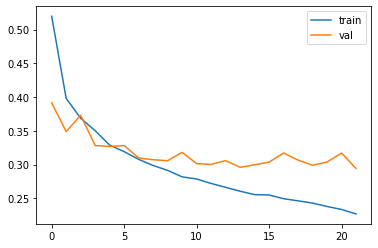

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'][:-30])
plt.plot(hist.history['val_loss'][:-30])
plt.legend(['train', 'val'])

In [ ]:
model = keras.models.load_model("best.h5")
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.3661 - accuracy: 0.8719


[0.3660570979118347, 0.8719000220298767]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation='softmax'))

es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy', optimizer='adam')

hist = model.fit(train_scaled, train_target, epochs = 10000,
          validation_data = (test_scaled, test_target),
          callbacks = [es])

Epoch 1/10000
4/4 [==============================] - 0s 56ms/step - loss: 1.8204 - accuracy: 0.0357 - val_loss: 1.7620 - val_accuracy: 0.0526
Epoch 2/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.7812 - accuracy: 0.0357 - val_loss: 1.7223 - val_accuracy: 0.0526
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 1.7415 - accuracy: 0.0357 - val_loss: 1.6831 - val_accuracy: 0.0526
Epoch 4/10000
4/4 [==============================] - 0s 13ms/step - loss: 1.7026 - accuracy: 0.0357 - val_loss: 1.6446 - val_accuracy: 0.0789
Epoch 5/10000
4/4 [==============================] - 0s 9ms/step - loss: 1.6643 - accuracy: 0.0357 - val_loss: 1.6069 - val_accuracy: 0.0789
Epoch 6/10000
4/4 [==============================] - 0s 11ms/step - loss: 1.6263 - accuracy: 0.0446 - val_loss: 1.5700 - val_accuracy: 0.0789
Epoch 7/10000
4/4 [==============================] - 0s 13ms/step - loss: 1.5914 - accuracy: 0.0536 - val_loss: 1.5341 - val_accuracy: 0.0789
Epoch 8/

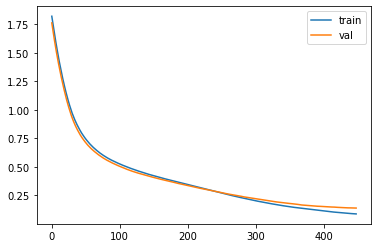

In [ ]:
plt.plot(hist.history['loss'][:-10])
plt.plot(hist.history['val_loss'][:-10])
plt.legend(['train', 'val'])

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
data, target = boston['data'], boston['target']

# df = pd.DataFrame(data, columns = boston['feature_names'])
# df['target'] = target

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

model = keras.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (13,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))

model.compile(loss = 'mse', metrics = 'mae', optimizer='adam')

hist = model.fit(train_scaled, train_target, epochs = 10000,
          validation_data = (test_scaled, test_target),
          callbacks = [es])

Epoch 1/10000


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

12/12 [==============================] - 1s 14ms/step - loss: 579.1172 - mse: 579.1172 - val_loss: 599.3663 - val_mse: 599.3663
Epoch 2/10000
12/12 [==============================] - 0s 3ms/step - loss: 563.4557 - mse: 563.4557 - val_loss: 583.7837 - val_mse: 583.7837
Epoch 3/10000
12/12 [==============================] - 0s 6ms/step - loss: 547.8684 - mse: 547.8684 - val_loss: 568.1254 - val_mse: 568.1254
Epoch 4/10000
12/12 [==============================] - 0s 3ms/step - loss: 532.2965 - mse: 532.2965 - val_loss: 552.2758 - val_mse: 552.2758
Epoch 5/10000
12/12 [==============================] - 0s 4ms/step - loss: 516.2723 - mse: 516.2723 - val_loss: 535.7725 - val_mse: 535.7725
Epoch 6/10000
12/12 [==============================] - 0s 3ms/step - loss: 499.9019 - mse: 499.9019 - val_loss: 518.6155 - val_mse: 518.6155
Epoch 7/10000
12/12 [==============================] - 0s 3ms/step - loss: 482.2037 - mse: 482.2037 - val_loss: 501.2281 - val_mse: 501.2281
Epoch 8/10000
12/12 [=====

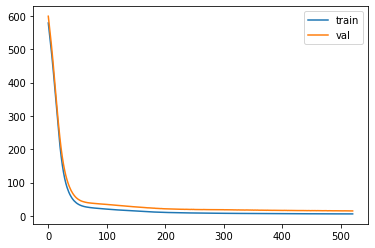

In [ ]:
plt.plot(hist.history['loss'][:-10])
plt.plot(hist.history['val_loss'][:-10])
plt.legend(['train', 'val'])

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255
val_scaled = val_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 32, 
                              activation = 'relu', 
                              kernel_size = (3,3), 
                              padding = 'same', 
                              input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(filters = 64, 
                              activation = 'relu', 
                              kernel_size = (3,3), 
                              padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_26 (Dense)            (None, 512)             

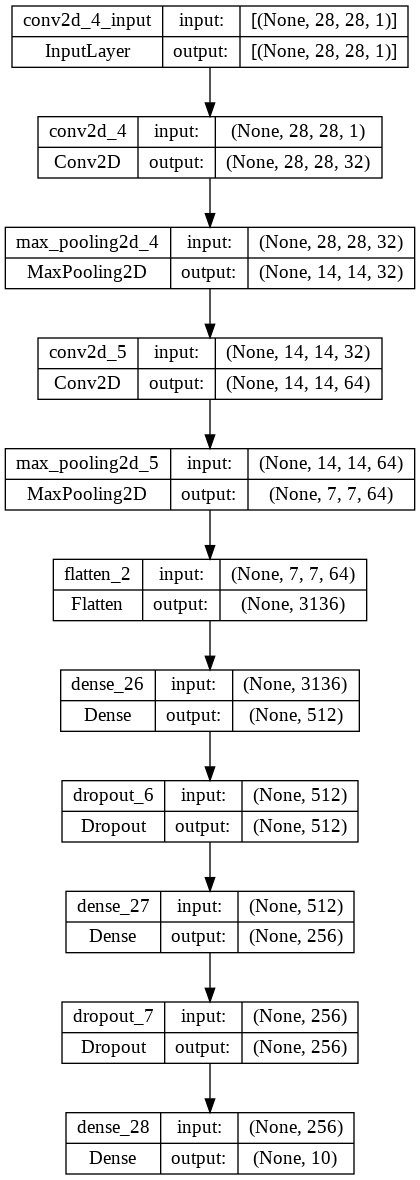

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
es = keras.callback.EarlyStopping(patience=5, restore_best_weight = True)

hist = model.fit(train_scaled, train_target, epochs = 10000,
          validation_data = (val_scaled, val_target),
          callbacks = [es])

Epoch 1/10000
1688/1688 [==============================] - 71s 42ms/step - loss: 0.4335 - accuracy: 0.8438 - val_loss: 0.2931 - val_accuracy: 0.8928
Epoch 2/10000
1688/1688 [==============================] - 70s 41ms/step - loss: 0.2798 - accuracy: 0.8988 - val_loss: 0.2553 - val_accuracy: 0.9082
Epoch 3/10000
1688/1688 [==============================] - 79s 47ms/step - loss: 0.2329 - accuracy: 0.9133 - val_loss: 0.2219 - val_accuracy: 0.9232
Epoch 4/10000
1688/1688 [==============================] - 73s 43ms/step - loss: 0.2020 - accuracy: 0.9257 - val_loss: 0.2328 - val_accuracy: 0.9178
Epoch 5/10000
1688/1688 [==============================] - 70s 42ms/step - loss: 0.1772 - accuracy: 0.9341 - val_loss: 0.2137 - val_accuracy: 0.9303
Epoch 6/10000
1688/1688 [==============================] - 68s 41ms/step - loss: 0.1540 - accuracy: 0.9429 - val_loss: 0.2508 - val_accuracy: 0.9233
Epoch 7/10000
1688/1688 [==============================] - 70s 41ms/step - loss: 0.1370 - accuracy: 0.9489

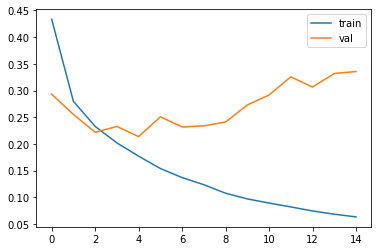

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'val'])

In [ ]:
# CNN : 91.7%
# ResNet : 94%
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2349 - accuracy: 0.9177


[0.23486413061618805, 0.9176999926567078]

In [ ]:
# 시계열 데이터
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words = 500)

In [ ]:
train_input.shape

(25000,)

In [ ]:
test_input.shape

(25000,)

In [ ]:
train_target

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <a list of 10 Patch objects>)

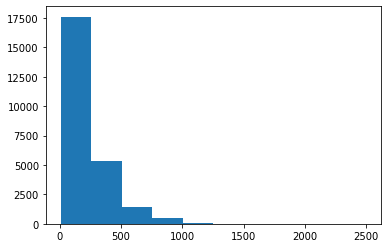

In [ ]:
import matplotlib.pyplot as plt

box = []
for i in train_input:
    box.append(len(i))

plt.hist(box)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100, truncating='pre') # post
test_seq = pad_sequences(test_input, maxlen = 100, truncating='pre')

In [ ]:
train_seq.shape

(25000, 100)

In [ ]:
train_seq[0]

array([  2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,  16,
        82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,   2,
         5,   2,  36,  71,  43,   2, 476,  26, 400, 317,  46,   7,   4,
         2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,  56,
        26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 134, 476,  26,
       480,   5, 144,  30,   2,  18,  51,  36,  28, 224,  92,  25, 104,
         4, 226,  65,  16,  38,   2,  88,  12,  16, 283,   5,  16,   2,
       113, 103,  32,  15,  16,   2,  19, 178,  32], dtype=int32)

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
test_oh = keras.utils.to_categorical(test_seq)

In [ ]:
train_oh.shape

(25000, 100, 500)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(16, activation = 'relu', input_shape = (100, 500)))
model.add(keras.layers.Dense(2, activation = 'softmax'))

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy', optimizer = 'adam')

hist = model.fit(train_oh, train_target, epochs = 10000,
                 validation_data = (test_oh, test_target),
                 callbacks = [es])

Epoch 1/10000
782/782 [==============================] - 39s 49ms/step - loss: 12932315.0000 - accuracy: 0.5985 - val_loss: 1877.4924 - val_accuracy: 0.6840
Epoch 2/10000
782/782 [==============================] - 38s 49ms/step - loss: 119346.6094 - accuracy: 0.7126 - val_loss: 1241.5391 - val_accuracy: 0.7056
Epoch 3/10000
782/782 [==============================] - 38s 49ms/step - loss: 2011.6248 - accuracy: 0.7078 - val_loss: 273.6531 - val_accuracy: 0.6943
Epoch 4/10000
782/782 [==============================] - 37s 48ms/step - loss: 874.9481 - accuracy: 0.7009 - val_loss: 506.8138 - val_accuracy: 0.7006
Epoch 5/10000
782/782 [==============================] - 37s 48ms/step - loss: 362.0198 - accuracy: 0.7026 - val_loss: 223.0936 - val_accuracy: 0.6986
Epoch 6/10000
782/782 [==============================] - 37s 48ms/step - loss: 271.5188 - accuracy: 0.7018 - val_loss: 217.4577 - val_accuracy: 0.7003
Epoch 7/10000
782/782 [==============================] - 37s 48ms/step - loss: 230.

KeyboardInterrupt: ignored

In [ ]:
# 외국인 관광객 데이터

import pandas as pd

df = pd.read_excel("kto_201001.xlsx", header=1, skipfooter=4, usecols = 'A:G')
df['관광객비율(%)'] = df['관광'] / df['계'] * 100
tsum = sum(df['관광'])
df['전체비율(%)'] = df['관광'] / tsum * 100
df

,국적,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%)
0,아시아주,329131,18238,421,4339,80916,433045,76.003880,41.057413
1,일본,202825,1750,89,549,3971,209184,96.960093,25.301384
2,대만,35788,41,17,37,516,36399,98.321382,4.464370
3,홍콩,13874,55,0,21,595,14545,95.386731,1.730711
4,마카오,554,0,0,0,0,554,100.000000,0.069109
...,...,...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350,25.851852,0.043536
63,기타대륙,10,3,0,0,0,13,76.923077,0.001247
64,국적미상,10,3,0,0,0,13,76.923077,0.001247
65,교포소계,0,0,0,0,22537,22537,0.000000,0.000000


In [ ]:
total = []

for y in range(2010, 2021):
    for m in range(1, 13):
        t1 = str(y)
        t2 = str(m).zfill(2) # zero
        name = t1 + t2
        
        # try안에서 에러가 발생하면 에러를 발생시키지말고 except를 실행해라라
        try:
            df = pd.read_excel(f"kto_{name}.xlsx", header=1, skipfooter=4, usecols = 'A:G')
            df['년'] = t1
            df['월'] = t2
            df['기준년월'] = f"{t1}-{t2}"
            df['관광객비율(%)'] = df['관광'] / df['계'] * 100
            tsum = sum(df['관광'])
            df['전체비율(%)'] = df['관광'] / tsum * 100
            total.append(df)
        except:
            pass

In [ ]:
len(total)

125

In [ ]:
# 중국인 입국객 추이 파악
df = pd.concat(total, ignore_index=True)
df

,국적,관광,상용,공용,유학/연수,기타,계,년,월,기준년월,관광객비율(%),전체비율(%)
0,아시아주,329131,18238,421,4339,80916,433045,2010,01,2010-01,76.003880,41.057413
1,일본,202825,1750,89,549,3971,209184,2010,01,2010-01,96.960093,25.301384
2,대만,35788,41,17,37,516,36399,2010,01,2010-01,98.321382,4.464370
3,홍콩,13874,55,0,21,595,14545,2010,01,2010-01,95.386731,1.730711
4,마카오,554,0,0,0,0,554,2010,01,2010-01,100.000000,0.069109
...,...,...,...,...,...,...,...,...,...,...,...,...
8370,아프리카 기타,3,1,3,6,118,131,2020,05,2020-05,2.290076,0.024546
8371,기타대륙,1,0,0,0,3,4,2020,05,2020-05,25.000000,0.008182
8372,국적미상,1,0,0,0,3,4,2020,05,2020-05,25.000000,0.008182
8373,교포소계,0,0,0,0,790,790,2020,05,2020-05,0.000000,0.000000


In [ ]:
df['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
# df[df["국적"] == '중국']

for i in df['국적'].unique():
    sample = df[df['국적'] == i]
    sample.to_excel(f"[국적별 관광객 데이터] {i}.xlsx")

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

<ipython-input-9-82d4cbad2c42>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))
<ipython-input-9-82d4cbad2c42>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))
<ipython-input-9-82d4cbad2c42>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,

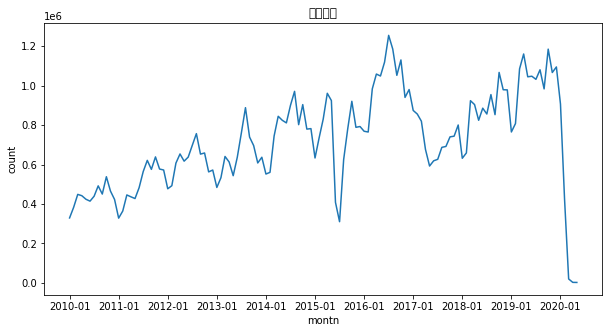

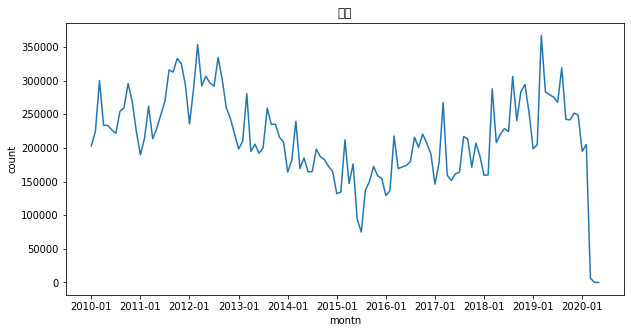

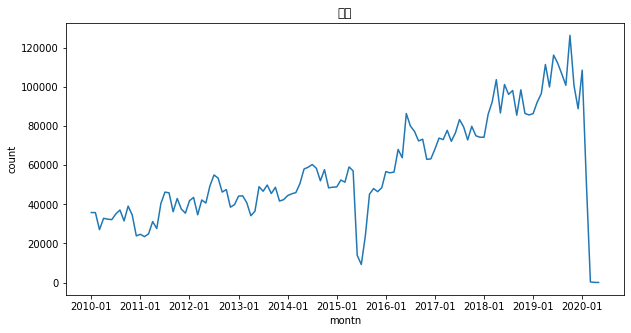

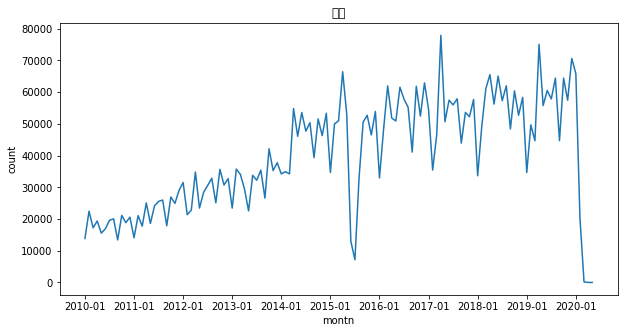

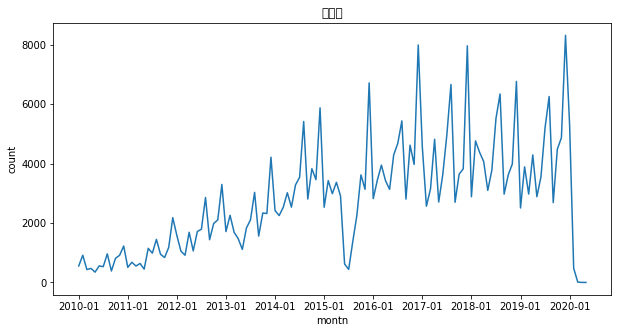

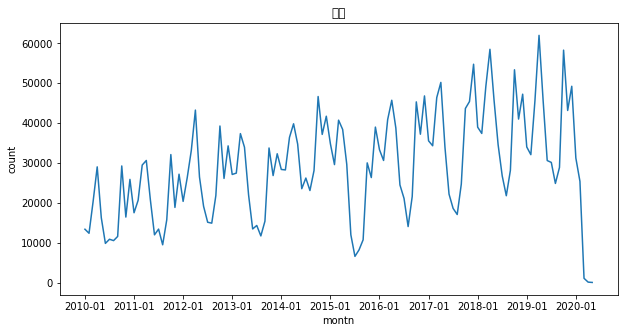

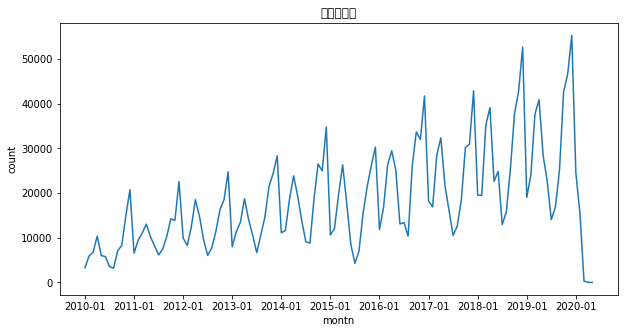

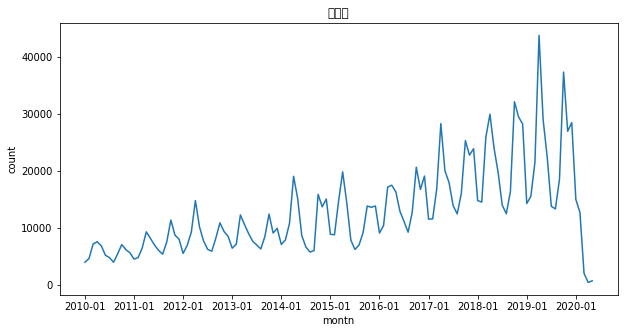

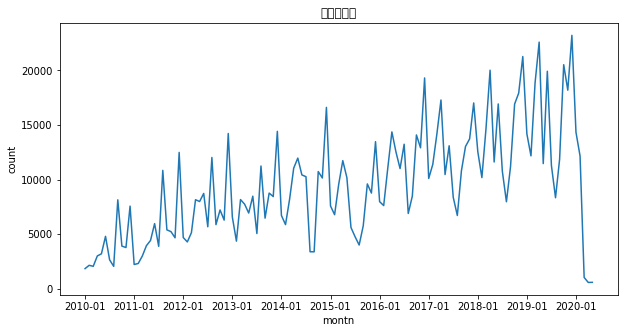

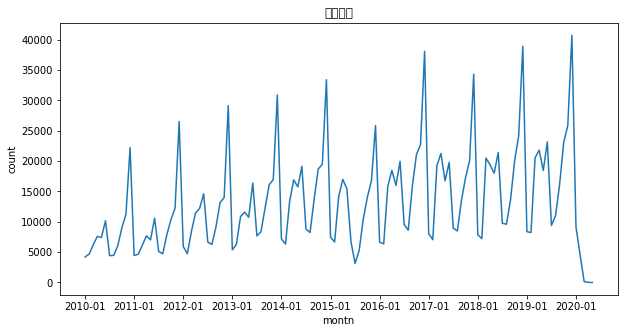

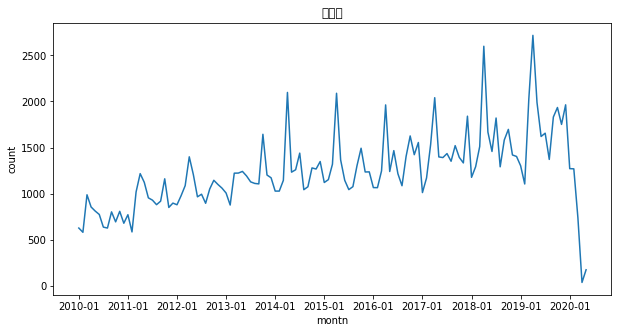

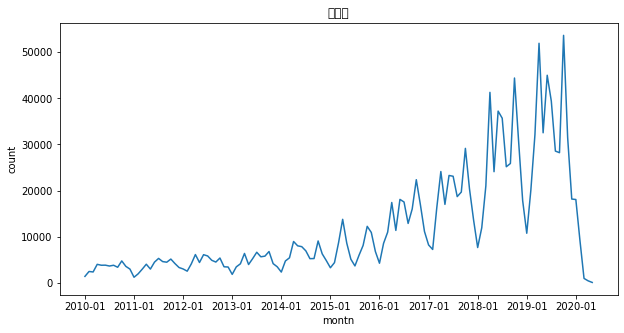

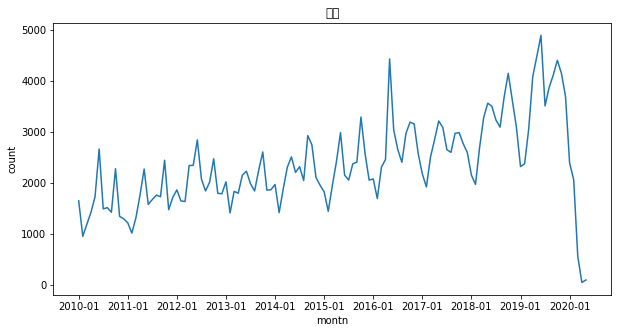

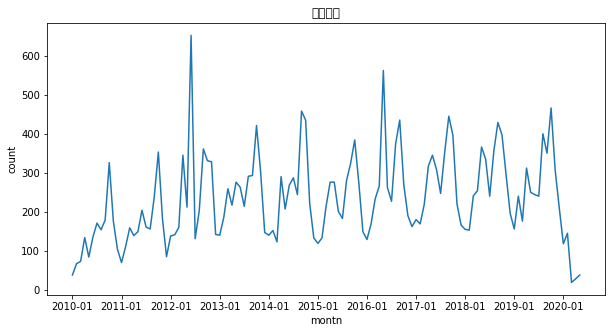

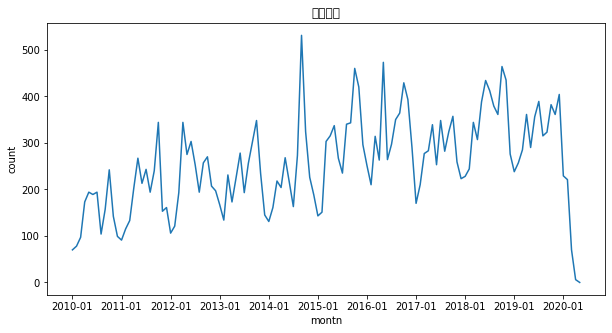

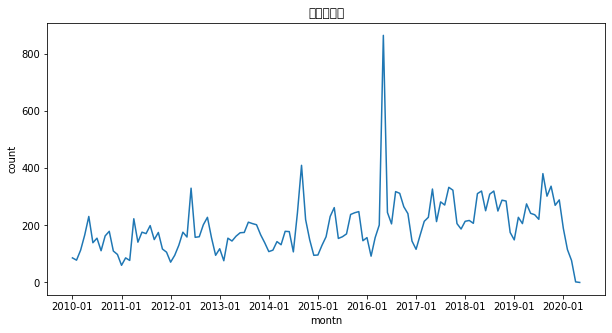

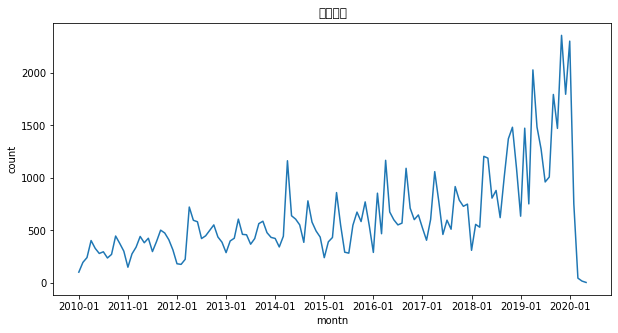

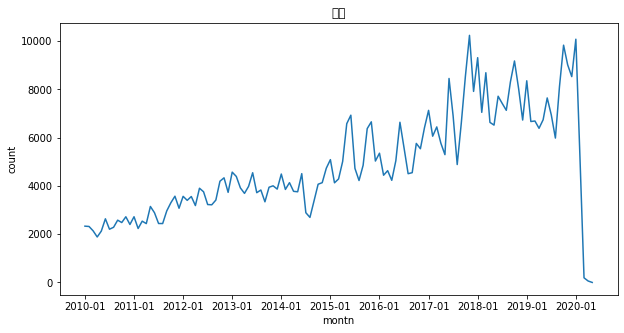

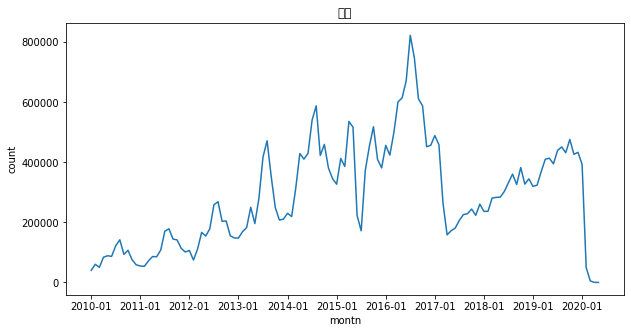

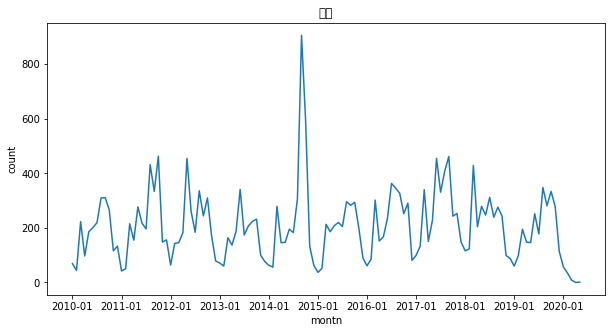

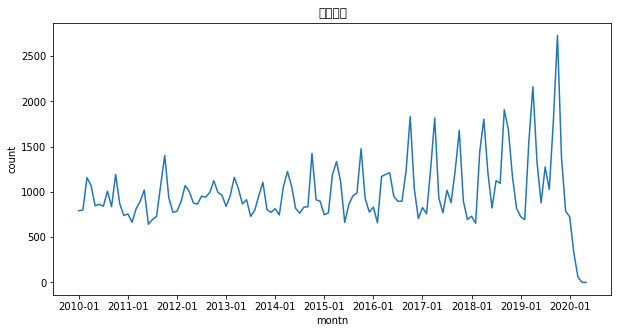

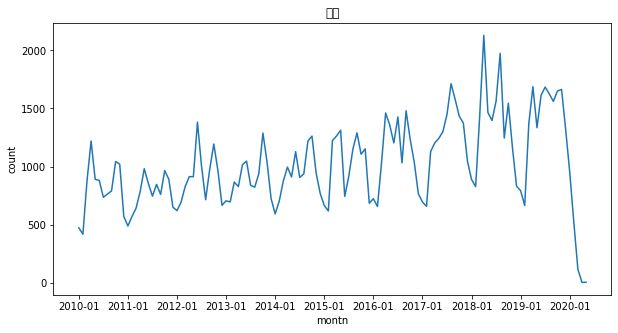

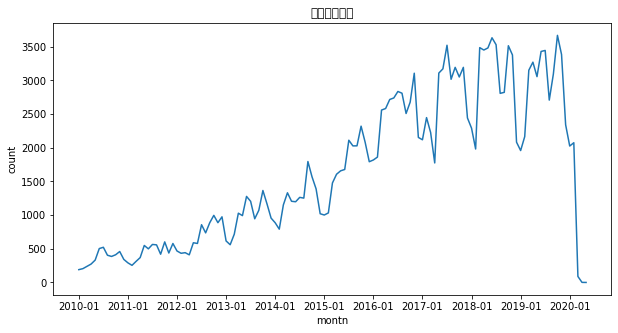

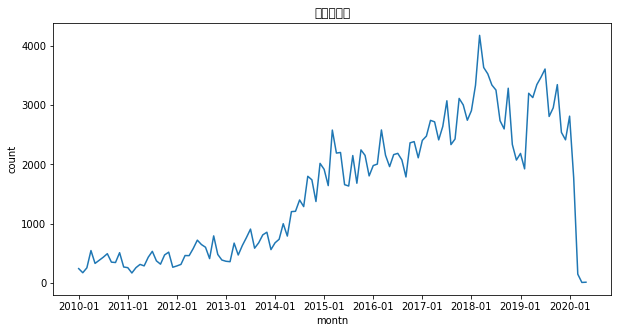

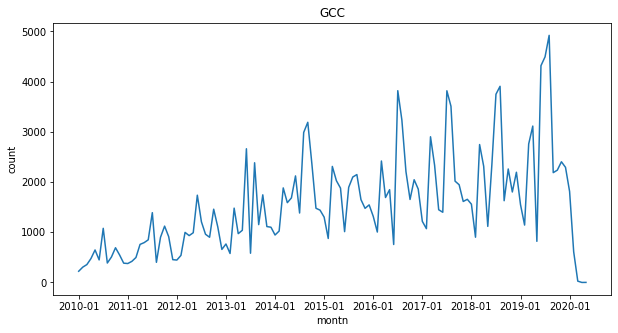

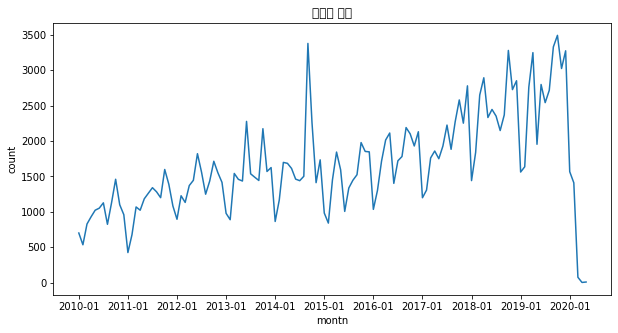

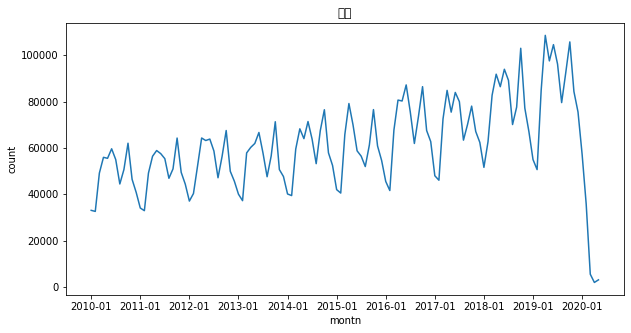

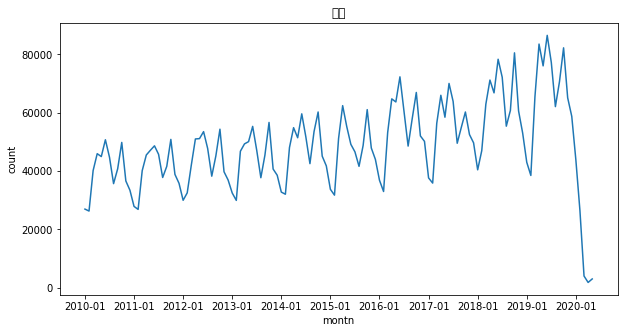

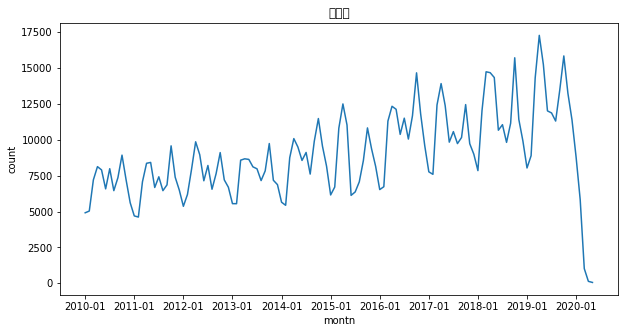

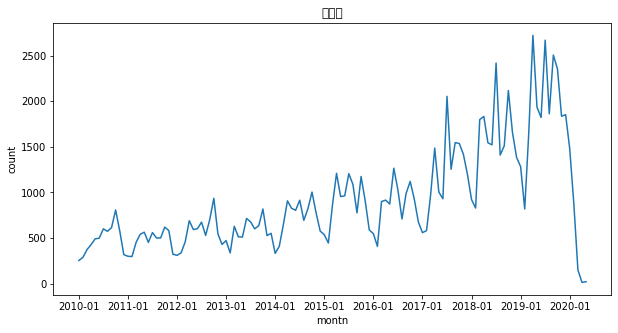

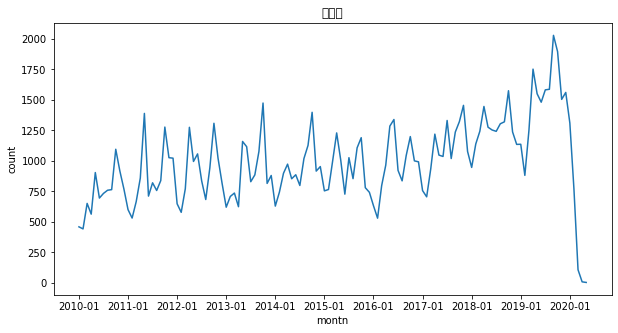

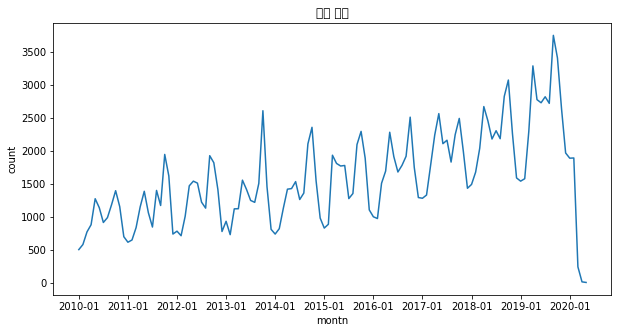

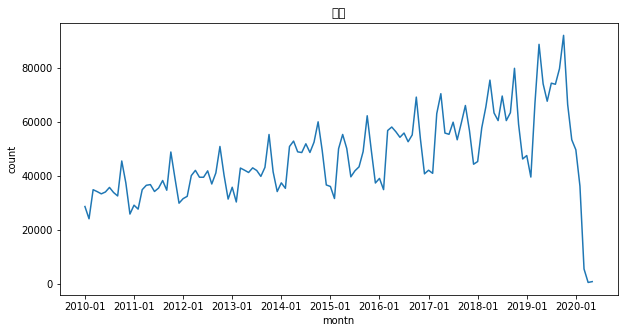

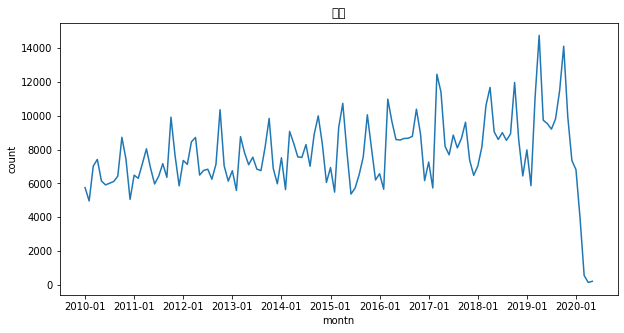

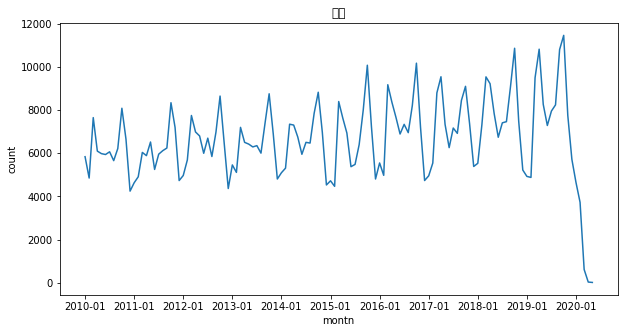

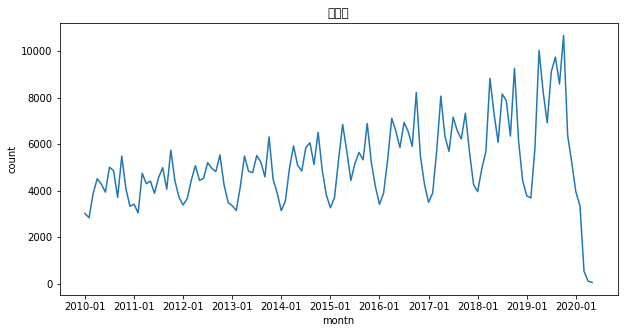

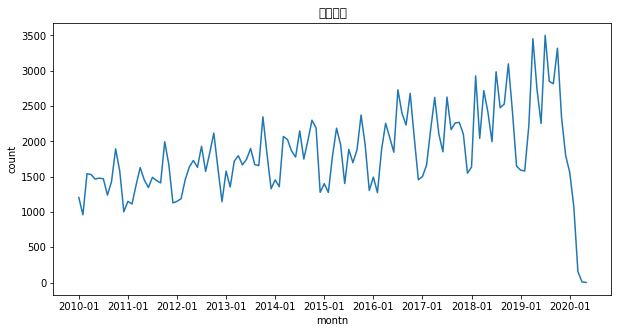

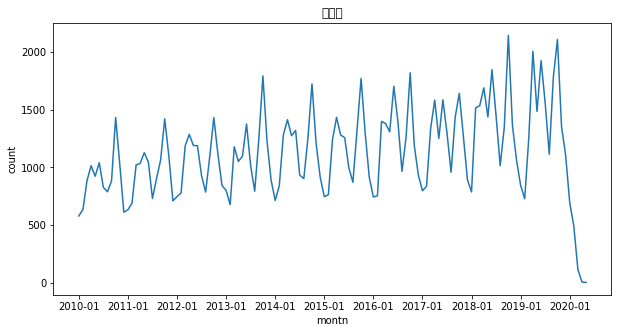

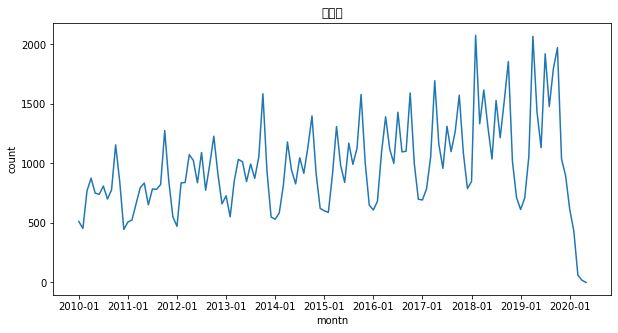

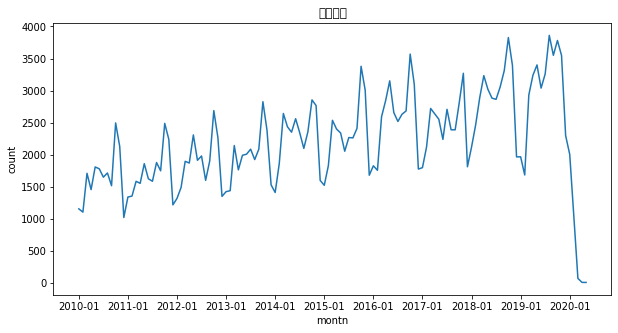

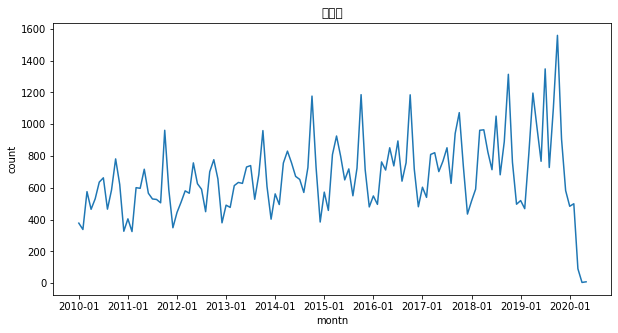

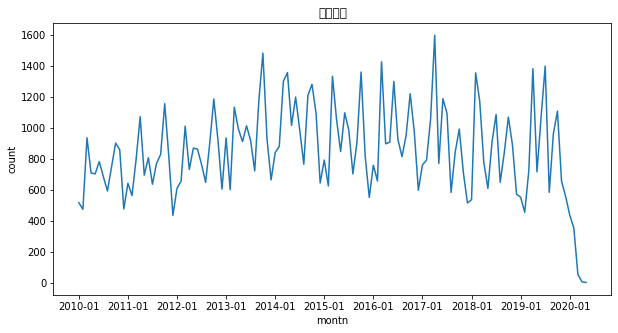

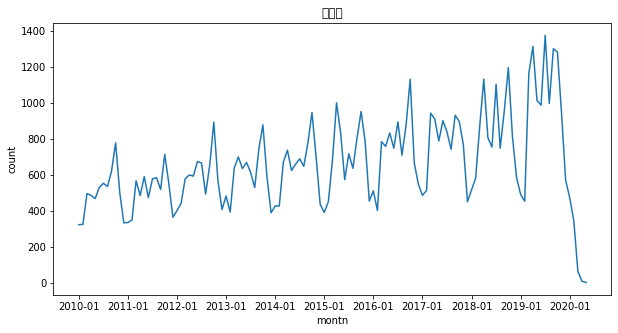

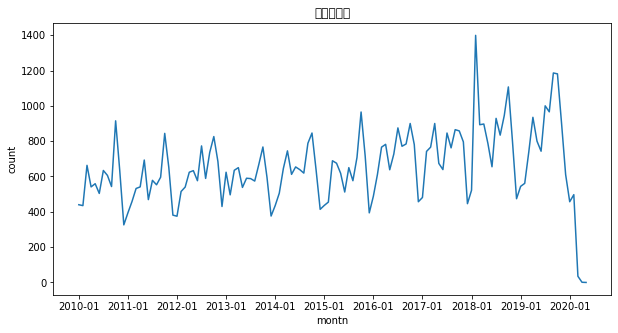

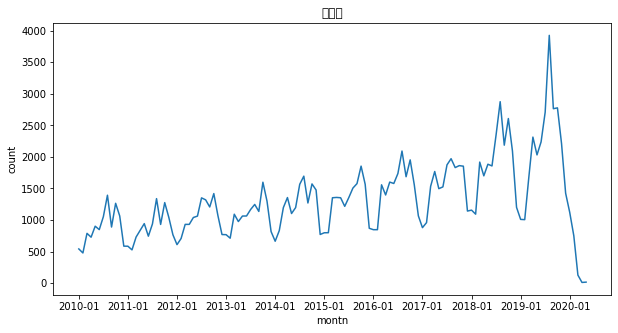

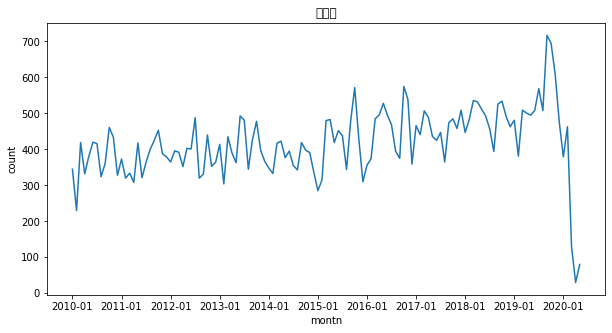

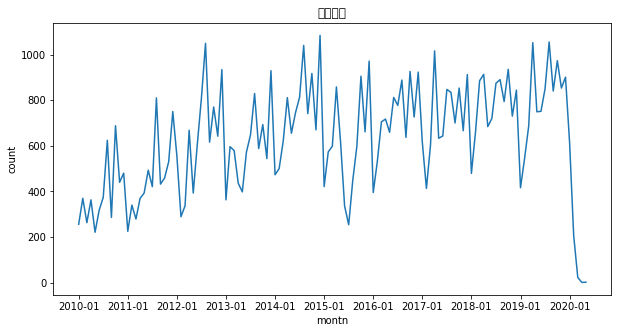

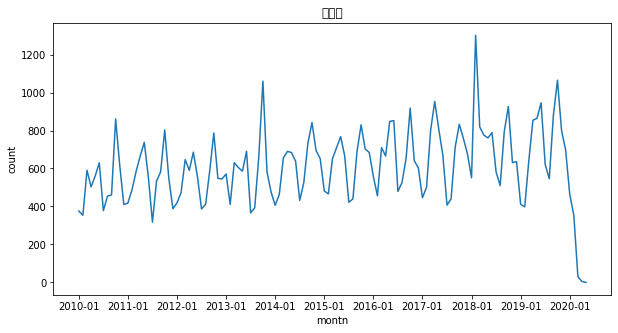

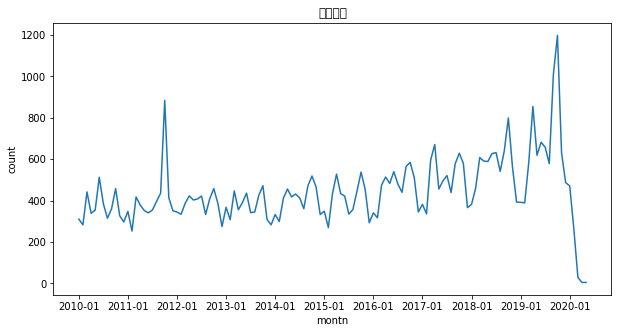

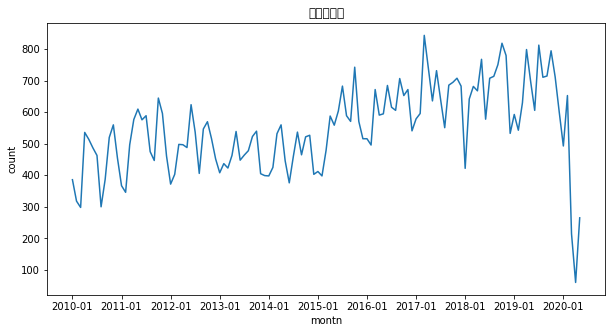

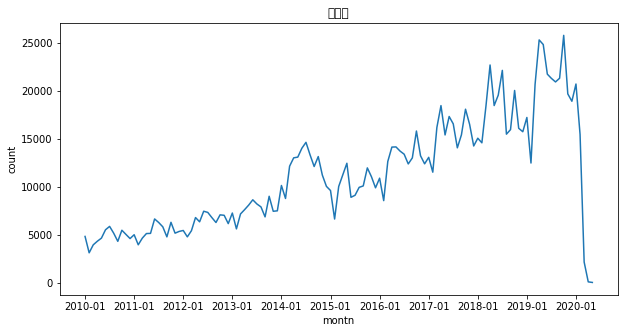

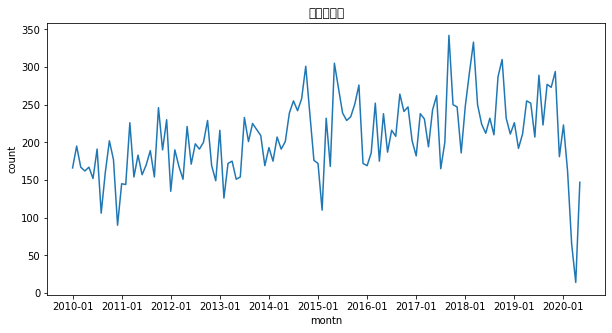

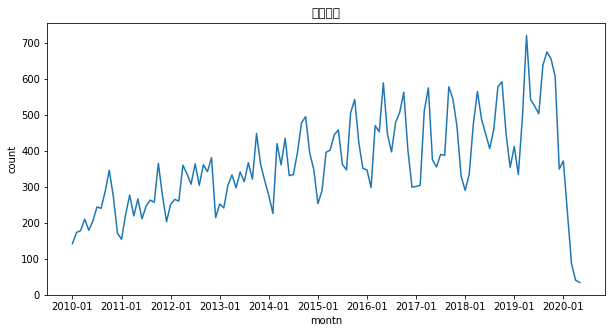

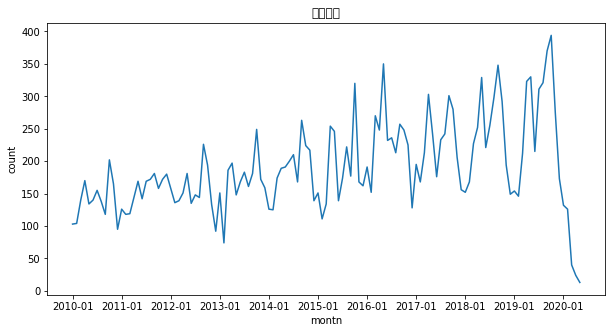

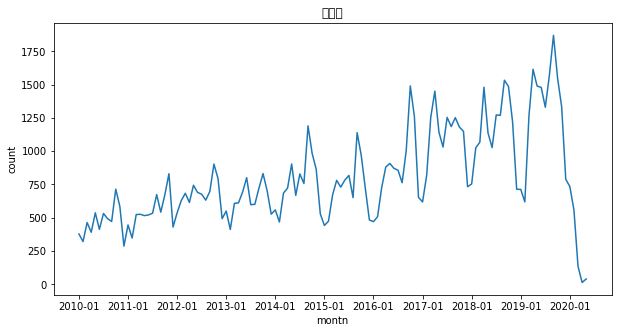

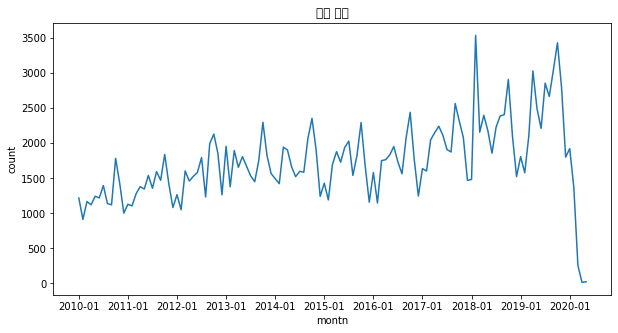

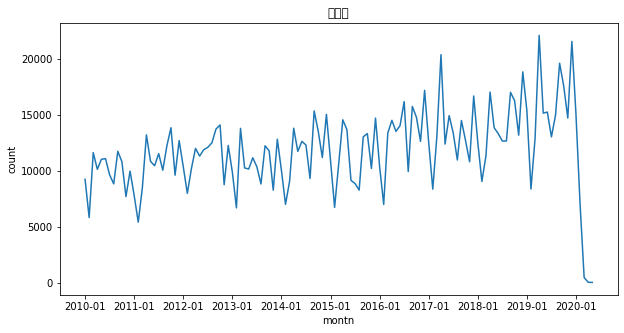

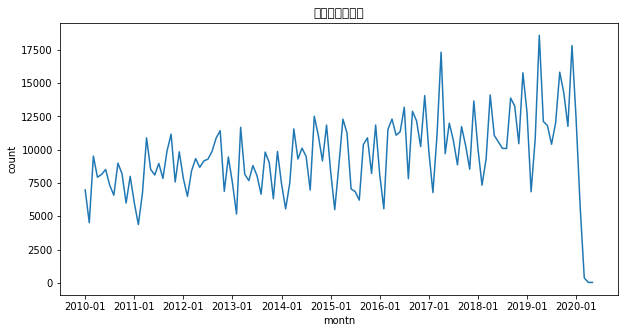

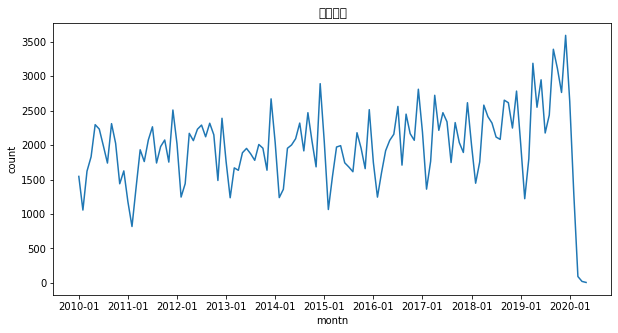

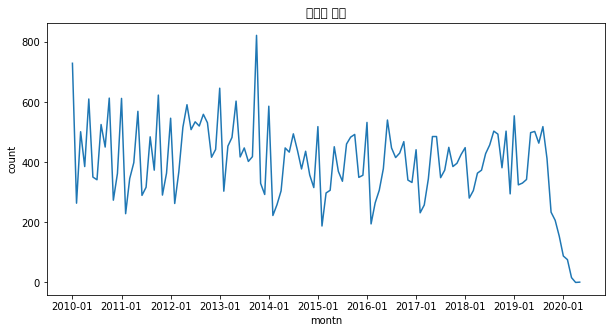

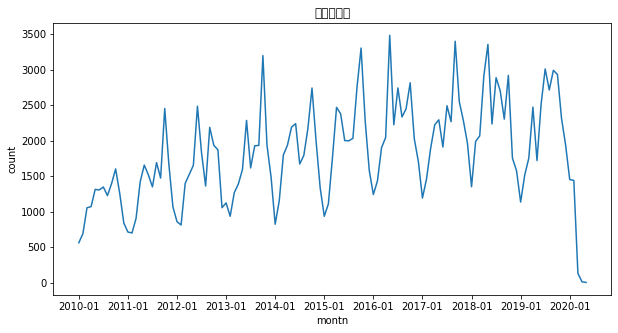

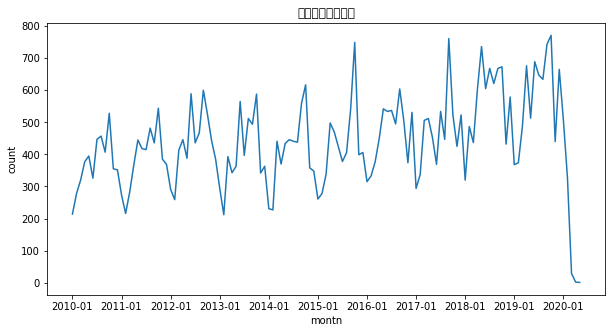

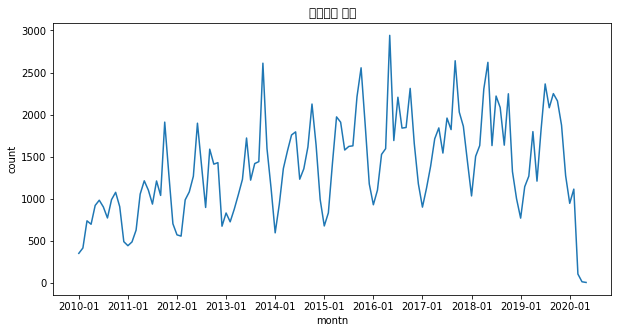

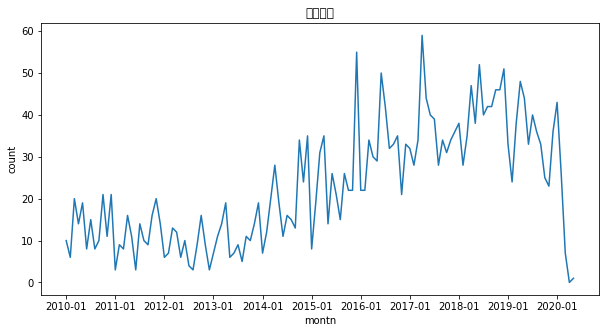

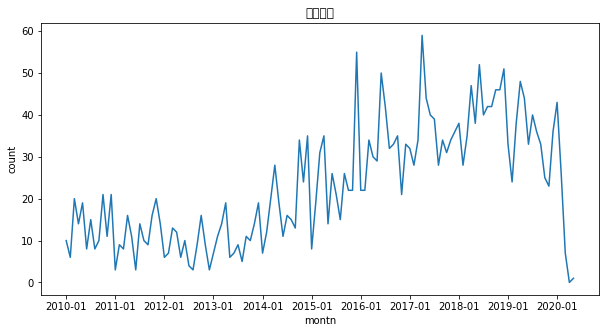

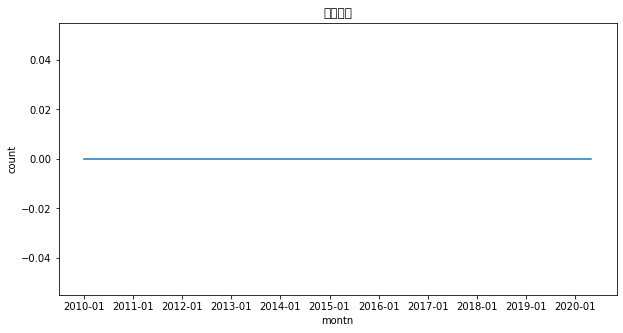

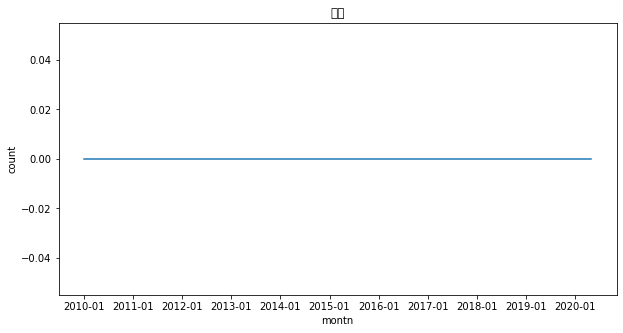

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'NanumBarunGothic')

for i in df['국적'].unique():
    sample = df[df['국적'] == i]

    plt.figure(figsize = (10, 5))
    #plt.title(f"{i}")
    plt.plot(sample['기준년월'], sample['관광'])
    plt.xlabel("montn")
    plt.ylabel("count")
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

([<matplotlib.axis.XTick at 0x7f8079f5db80>,
 <a list of 11 Text major ticklabel objects>)

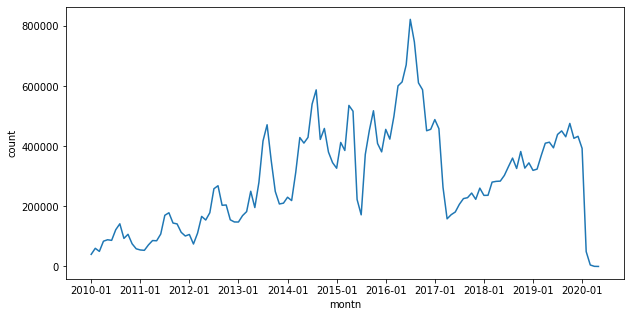

In [ ]:
china = df[df['국적'] == "중국"]
plt.figure(figsize = (10, 5))
plt.plot(china['기준년월'], china['관광'])
plt.xlabel("montn")
plt.ylabel("count")
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

In [ ]:
china_pivot = china.pivot_table(index = '년',
                                columns = '월',
                                values = '관광')
china_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


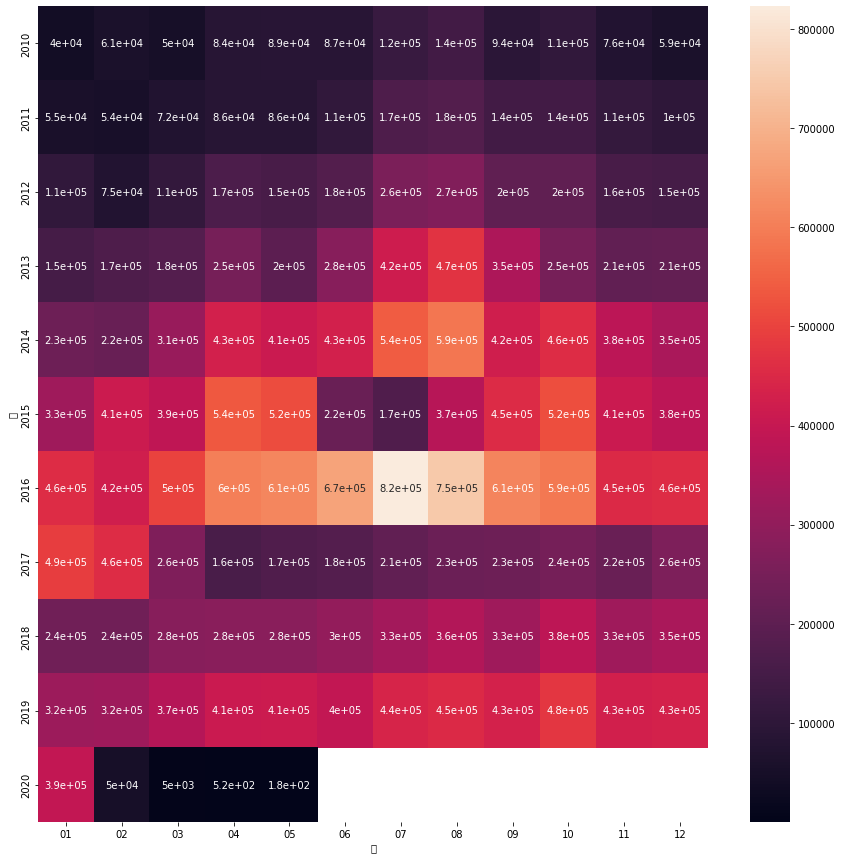

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(china_pivot, annot=True)